<a href="https://colab.research.google.com/github/AyoubHaddou/app_feeling_dashboard_NLP/blob/main/preprocessing_models_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
!pip install texthero

!pip install fasttext

!pip install tensorflow_addons
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
nltk.download('wordnet')
nltk.download('omw-1.4')

!apt-get install -y xvfb
import os
os.system('Xvfb :1 -screen 0 720x720x16 &')
os.environ['DISPLAY'] = ":1.0"

!pip install svgling


     |████████████████████████████████| 1.5 MB 6.9 MB/s 
     |████████████████████████████████| 235 kB 60.3 MB/s 
     |████████████████████████████████| 749 kB 59.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 68 kB 3.2 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3145980 sha256=549144bef2938ca61e9ec14b21c7e61d04754aaa0808a098ad5e22ef2feb8772
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
     |████████████████████████████████| 1.1 MB 5.0 MB/s 


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 1s (1,015 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 67 kB 3.0 MB/

In [ ]:
import urllib.request
# urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')
# !unzip "/content/glove.6B.zip" -d "/content/"



In [ ]:
!pip install fasttext

# Imports

In [ ]:
import tensorflow_hub as hub 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import texthero as hero

import tensorflow as tf
from keras.models import Sequential
from keras import layers

# example of l2 on a dense layer
from keras.regularizers import l2
from keras.utils import np_utils

import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE

import nltk
import os

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten,Embedding,Dense
from tensorflow.keras.models import Sequential
import numpy as np


tf.random.set_seed(2)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


# Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emotion_final.csv')
df.shape
# Pour vs code : df = pd.read_csv('data/Emotion_final.csv')

(21459, 2)

## I. Lemmatization

In [ ]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [ ]:
from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['nltk_text_lematize'] = df['Text'].apply(lambda x : lemmatize_sentence(x))
df

,Text,Emotion,nltk_text_lematize
0,i didnt feel humiliated,sadness,i didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feel so hopeless to so damned ho...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i be ever feel nostalgic about the fireplace i...
4,i am feeling grouchy,anger,i be feel grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,Melissa star at her friend in dism
21455,Successive state elections have seen the gover...,fear,Successive state election have see the govern ...
21456,Vincent was irritated but not dismay,fear,Vincent be irritate but not dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,Kendall-Hume turn back to face the dismayed coup


## II. StopWords

In [ ]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel",'aa','ab','http','anything','less','ever',"im",'href','actualy','enough','actually','look','come','sure','many','I','got','able','year','help','take','feels','felt','like','lot','go','around','makes','back','work','need','pretty','way','though','see','ive','good','also','right','dont','cant','say','didnt','could','even','day','every','make','made','much','going','one',"feeling",'things','something',"feelings",'always','never','today','days','life',"like","really",'know','time','get','little','bit','would','want','think','people','still']))
df['texthero_stopwords_text'] = hero.remove_urls(df.Text)
df['texthero_stopwords_text'] = hero.remove_stopwords(df.texthero_stopwords_text, custom_stopwords)
df['texthero_stopwords_text'] = hero.remove_punctuation(df.texthero_stopwords_text)
df['texthero_stopwords_text'] = hero.remove_digits(df.texthero_stopwords_text)
df['texthero_stopwords_text'] = hero.remove_urls(df.texthero_stopwords_text)

# df['textHero'] = hero.clean(df['textHero'])

In [ ]:
NUM_TOP_WORDS = 10
df.groupby('Emotion')['texthero_stopwords_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

In [ ]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel",'start','try','ab','http','anything','less','ever','thing',"im",'find','tell','href','actualy','enough','actually','look','come','sure','many','I','got','able','year','help','take','feels','felt','like','lot','go','around','makes','back','work','need','pretty','way','though','see','ive','good','also','right','dont','cant','say','didnt','could','even','day','every','make','made','much','going','one',"feeling",'things','something',"feelings",'always','never','today','days','life',"like","really",'know','time','get','little','bit','would','want','think','people','still']))
df['texthero_stopwords_lemmatize'] = hero.remove_urls(df.nltk_text_lematize)
df['texthero_stopwords_lemmatize'] = hero.remove_stopwords(df.texthero_stopwords_lemmatize, custom_stopwords)
df['texthero_stopwords_lemmatize'] = hero.remove_punctuation(df.texthero_stopwords_lemmatize)
df['texthero_stopwords_lemmatize'] = hero.remove_digits(df.texthero_stopwords_lemmatize)
df['texthero_stopwords_lemmatize'] = hero.remove_urls(df.texthero_stopwords_lemmatize)

# df['nltk_lematize'] = hero.clean(df['nltk_lematize'])

In [ ]:
NUM_TOP_WORDS = 10
df.groupby('Emotion')['texthero_stopwords_lemmatize'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion               
anger     angry           116
          bother           87
          resentful        87
          cold             86
          irritable        84
          greedy           77
          friend           76
          love             75
          fuck             75
          wrong            74
fear      anxious         125
          nervous         103
          strange          93
          afraid           85
          weird            79
          unsure           75
          vulnerable       75
          apprehensive     74
          uncertain        74
          scar             72
happy     love            298
          well            256
          happy           217
          give            158
          quite           134
          write           126
          leave           126
          content         116
          new             109
          first           107
love      love            244
          care             90
          sweet  

## III. Transform Emotion column to int

In [ ]:
df.loc[df.Emotion == "sadness", 'Emotion'] = 0
df.loc[df.Emotion == "anger", 'Emotion'] = 1
df.loc[df.Emotion == "love", 'Emotion'] = 2
df.loc[df.Emotion == "surprise", 'Emotion'] = 3 
df.loc[df.Emotion == "fear", 'Emotion'] = 4
df.loc[df.Emotion == "happy", 'Emotion'] = 5 

df.Emotion = np.asarray(df.Emotion).astype('int64').reshape((-1,1))

## Text to sequence

In [ ]:
from nltk.tokenize import word_tokenize 

# J'utilise encore le word_tokenize de nltk pour creer une colonne tokenize 

def create_corpus(df):
  corpus = []
  for text in df.texthero_stopwords_lemmatize :
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)
  return corpus 

corpus = create_corpus(df)

# df['nltk_tokenize_texthero'] = corpus


In [ ]:
num_words = len(corpus)
num_words

21459

In [ ]:
from keras.preprocessing.text import Tokenizer 

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df.texthero_stopwords_lemmatize)
word_index = tokenizer.word_index

df['to_sequence_stopwords_text'] = tokenizer.texts_to_sequences(df.texthero_stopwords_text)
df['to_sequence_stopwords_lemmatize'] = tokenizer.texts_to_sequences(df.texthero_stopwords_lemmatize)
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1600],[636]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 1132]","[358, 3663, 387, 8, 38, 1132]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9414, 295, 36, 337, 132]","[1254, 295, 36, 337, 132]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15628, 5, 2411]","[15628, 651, 5, 2411]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15629, 372, 1721, 15631]","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7405, 675, 802]","[7405, 870, 802]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15632, 15633, 33, 1721, 15634]","[15632, 15633, 107, 33, 1721, 15634]"


# Sklearn with countVectorizer

## I. With lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_lemmatize, df.Emotion, train_size=0.92, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_lemmatize)


X_train_t = vectorizer.transform(X_train)
X_test_t = vectorizer.transform(X_test)
X_val_t = vectorizer.transform(X_valid)

In [ ]:
print(X_train_t.shape)
print(y_train.shape)

(19742, 7151)
(19742,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_t, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train_t)
accuracy_score(y_train, predicted)

0.909735589099382

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test_t)
accuracy_score(y_test, predicted)

0.8391608391608392

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_t, y_train)

predicted = clf.predict(X_val_t)
accuracy_score(y_valid, predicted)

0.8253783469150174

In [ ]:
from sklearn import metrics
predicted = clf.predict(X_val_t)
print(metrics.classification_report(y_valid, predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       256
           1       0.82      0.74      0.78        97
           2       0.74      0.48      0.58        54
           3       0.86      0.42      0.57        45
           4       0.81      0.75      0.78        96
           5       0.82      0.92      0.87       311

    accuracy                           0.83       859
   macro avg       0.82      0.70      0.74       859
weighted avg       0.82      0.83      0.82       859



## II. Without lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords, df.Emotion, train_size=0.92, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords)


X_train_t = vectorizer.transform(X_train)
X_test_t = vectorizer.transform(X_test)
X_val_t = vectorizer.transform(X_valid)

In [ ]:
clf = MultinomialNB().fit(X_train_t, y_train)

predicted = clf.predict(X_train_t)
accuracy_score(y_train, predicted)

0.9319217911052579

In [ ]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test_t)
accuracy_score(y_test, predicted)

0.8321678321678322

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_t, y_train)

predicted = clf.predict(X_val_t)
accuracy_score(y_valid, predicted)

0.8137369033760187

In [ ]:
from sklearn import metrics
predicted = clf.predict(X_val_t)
print(metrics.classification_report(y_valid, predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       256
           1       0.78      0.71      0.75        97
           2       0.76      0.46      0.57        54
           3       0.75      0.47      0.58        45
           4       0.78      0.72      0.75        96
           5       0.82      0.91      0.86       311

    accuracy                           0.81       859
   macro avg       0.79      0.70      0.73       859
weighted avg       0.81      0.81      0.81       859



# Keras with CountVectorizer

## I. Without lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_text, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_text)


X_train_t = vectorizer.transform(X_train).todense()
X_test_t = vectorizer.transform(X_test).todense()
X_val_t = vectorizer.transform(X_valid).todense()

In [ ]:
X_train_t

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names_out()

array(['aaron', 'abandon', 'abandoned', ..., 'zone', 'zooming', 'zumba'],
      dtype=object)

In [ ]:
model = Sequential()

initializer = tf.keras.initializers.HeNormal()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(layers.Embedding(200, X_train_t.shape[1]))

model.add(layers.Dense(220,kernel_initializer=initializer, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

Epoch 1/100
597/597 [==============================] - 6s 4ms/step - loss: 1.6572 - Accuracy: 0.3224 - val_loss: 1.4935 - val_Accuracy: 0.3424
Epoch 2/100
597/597 [==============================] - 2s 4ms/step - loss: 1.3025 - Accuracy: 0.5016 - val_loss: 1.0873 - val_Accuracy: 0.6229
Epoch 3/100
597/597 [==============================] - 2s 4ms/step - loss: 0.8446 - Accuracy: 0.7334 - val_loss: 0.7136 - val_Accuracy: 0.7915
Epoch 4/100
597/597 [==============================] - 2s 4ms/step - loss: 0.5334 - Accuracy: 0.8569 - val_loss: 0.5362 - val_Accuracy: 0.8373
Epoch 5/100
597/597 [==============================] - 2s 4ms/step - loss: 0.3747 - Accuracy: 0.8955 - val_loss: 0.4530 - val_Accuracy: 0.8534
Epoch 6/100
597/597 [==============================] - 2s 4ms/step - loss: 0.2864 - Accuracy: 0.9193 - val_loss: 0.4110 - val_Accuracy: 0.8695
Epoch 7/100
597/597 [==============================] - 2s 4ms/step - loss: 0.2285 - Accuracy: 0.9384 - val_loss: 0.3897 - val_Accuracy: 0.8669

In [ ]:
print(f"Train {model.evaluate(X_train_t, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_t, y_test, batch_size=64))
print("Validation:",model.evaluate(X_val_t, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.0618 - Accuracy: 0.9835
Train [0.061823826283216476, 0.9834537506103516]
19/19 [==============================] - 0s 4ms/step - loss: 0.3996 - Accuracy: 0.8712
Test: [0.39963334798812866, 0.8711864352226257]
19/19 [==============================] - 0s 4ms/step - loss: 0.3498 - Accuracy: 0.8959
Validation: [0.34981968998908997, 0.8958509564399719]


## II.With lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_lemmatize, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

vectorizer = CountVectorizer(max_df=0.62, min_df=2, stop_words='english')
vectorizer.fit(df.texthero_stopwords_lemmatize)


X_train_t = vectorizer.transform(X_train).todense()
X_test_t = vectorizer.transform(X_test).todense()
X_val_t = vectorizer.transform(X_valid).todense()

In [ ]:
model = Sequential()

initializer = tf.keras.initializers.HeNormal()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(layers.Embedding(200, X_train_t.shape[1]))

model.add(layers.Dense(220,kernel_initializer=initializer, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['Accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)

# model.summary()

history= model.fit(
    X_train_t,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
    validation_data=(X_test_t, y_test),
)

Epoch 1/100
597/597 [==============================] - 3s 4ms/step - loss: 1.6594 - Accuracy: 0.3455 - val_loss: 1.5066 - val_Accuracy: 0.4568
Epoch 2/100
597/597 [==============================] - 2s 4ms/step - loss: 1.3485 - Accuracy: 0.5437 - val_loss: 1.1628 - val_Accuracy: 0.6008
Epoch 3/100
597/597 [==============================] - 2s 4ms/step - loss: 0.9279 - Accuracy: 0.7120 - val_loss: 0.7899 - val_Accuracy: 0.7763
Epoch 4/100
597/597 [==============================] - 2s 4ms/step - loss: 0.6049 - Accuracy: 0.8433 - val_loss: 0.6015 - val_Accuracy: 0.8331
Epoch 5/100
597/597 [==============================] - 2s 4ms/step - loss: 0.4379 - Accuracy: 0.8806 - val_loss: 0.5162 - val_Accuracy: 0.8432
Epoch 6/100
597/597 [==============================] - 2s 4ms/step - loss: 0.3428 - Accuracy: 0.9048 - val_loss: 0.4735 - val_Accuracy: 0.8432
Epoch 7/100
597/597 [==============================] - 2s 4ms/step - loss: 0.2796 - Accuracy: 0.9251 - val_loss: 0.4515 - val_Accuracy: 0.8534

In [ ]:
print(f"Train {model.evaluate(X_train_t, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_t, y_test, batch_size=64))
print("Validation:",model.evaluate(X_val_t, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.0909 - Accuracy: 0.9737
Train [0.0908539816737175, 0.9736621379852295]
19/19 [==============================] - 0s 3ms/step - loss: 0.4516 - Accuracy: 0.8542
Test: [0.4516099691390991, 0.8542372584342957]
19/19 [==============================] - 0s 4ms/step - loss: 0.4078 - Accuracy: 0.8654
Validation: [0.4077915549278259, 0.8653683066368103]



# Embedding vector from glove 

In [ ]:
emmbed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:],'float32')
    emmbed_dict[word] = vectors
emmbed_dict

In [ ]:
df

,Text,Emotion,nltk_lematize,texthero_stopwords_lemmatize,texthero_stopwords,nltk_sequence_textlematize,nltk_sequence_without_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliate,humiliated,[636],[1600]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 38, 1132]","[358, 3663, 387, 8, 1132]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grab minute post greedy wrong,grabbing minute post greedy wrong,"[1254, 295, 36, 337, 132]","[9414, 295, 36, 337, 132]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa star friend dism,Melissa stared friend dism,"[15628, 651, 5, 2411]","[15628, 5, 2411]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state election govern party pumm...,Successive state elections seen governing pa...,"[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]","[15629, 372, 1721, 15631]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritate dismay,Vincent irritated dismay,"[7405, 870, 802]","[7405, 675, 802]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turn face dismayed coup,Kendall Hume turned face dismayed coup,"[15632, 15633, 107, 33, 1721, 15634]","[15632, 15633, 33, 1721, 15634]"


In [ ]:
num_words = len(word_index) +1 
embedding_matrix = np.zeros((num_words, 200))

for word, i in word_index.items():
  if i < num_words :
    emb_vec = emmbed_dict.get(word)
    if emb_vec is not None :
      embedding_matrix[i] = emb_vec 

In [ ]:
def aggregate_embedding_matrix(df):
  liste_matrix = []
  for idx,value in enumerate(df.nltk_sequence_without_lemmatize):
    operation = 0
    for j in value:
      operation += embedding_matrix[j]
    liste_matrix.append(operation)
  return liste_matrix

ope = aggregate_embedding_matrix(df)
df['text_to_matrix'] = ope

In [ ]:
def aggregate_embedding_matrix_lemmatize(df):
  liste_matrix = []
  for idx,value in enumerate(df.nltk_sequence_textlematize):
    operation = 0
    for j in value:
      operation += embedding_matrix[j]
    liste_matrix.append(operation)
  return liste_matrix


In [ ]:
ope = aggregate_embedding_matrix_lemmatize(df)
df['text_lemmatize_to_matrix'] = ope

In [ ]:
(embedding_matrix[358] == emmbed_dict.get('hopeless')).all()

True

In [ ]:
df

,Text,Emotion,nltk_lematize,texthero_stopwords_lemmatize,texthero_stopwords,nltk_sequence_textlematize,nltk_sequence_without_lemmatize,lemmatize_to_matrix,not_lemmatize_to_matrix
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliate,humiliated,[636],[1600],"[0.8154100179672241, 0.25582000613212585, -0.1...","[0.42827001214027405, -0.07417800277471542, -0..."
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 38, 1132]","[358, 3663, 387, 8, 1132]","[0.6299900412559509, 0.42705098539590836, 0.43...","[1.0143300294876099, 0.573360987007618, 0.2720..."
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grab minute post greedy wrong,grabbing minute post greedy wrong,"[1254, 295, 36, 337, 132]","[9414, 295, 36, 337, 132]","[-0.7930670194327831, 0.4528120066970587, -0.1...","[-1.4404370002448559, 0.5677019860595465, -0.2..."
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9..."
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57..."
...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa star friend dism,Melissa stared friend dism,"[15628, 651, 5, 2411]","[15628, 5, 2411]","[0.6665659993886948, 0.022105004638433456, -1....","[0.5868699997663498, -0.1435750015079975, -0.1..."
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state election govern party pumm...,Successive state elections seen governing pa...,"[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]","[15629, 372, 1721, 15631]","[-0.45267001539468765, 3.5843399837613106, 1.2...","[0.5509400069713593, 1.025770016014576, -0.026..."
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritate dismay,Vincent irritated dismay,"[7405, 870, 802]","[7405, 675, 802]","[-0.006319984793663025, -0.07642099261283875, ...","[-0.034049972891807556, -0.19360798969864845, ..."
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turn face dismayed coup,Kendall Hume turned face dismayed coup,"[15632, 15633, 107, 33, 1721, 15634]","[15632, 15633, 33, 1721, 15634]","[-0.7950479984283447, 0.5512525797821581, -1.0...","[-0.7470699995756149, 0.5611400795169175, -1.0..."


In [ ]:
df[df.texthero_stopwords_lemmatize.str.contains('hopeless')]

,Text,Emotion,nltk_lematize,texthero_stopwords_lemmatize,nltk_tokenize_texthero,nltk_sequence_texthero,sequence_to_matrix
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,"[hopeless, damned, hopeful, someone, care, awake]","[358, 3663, 387, 8, 38, 1132]","[0.6299900412559509, 0.42705098539590836, 0.43..."
164,i feel so sad and hopeless,0,i feel so sad and hopeless,sad hopeless,"[sad, hopeless]","[60, 358]","[0.5375899970531464, 0.2723510041832924, -0.28..."
312,i have many days where i feel hopeless today t...,0,i have many day where i feel hopeless today th...,hopeless light end yellow brick r...,"[hopeless, light, end, yellow, brick, road, sh...","[358, 381, 29, 3695, 7596, 942, 4368, 2896]","[1.9815749879926443, -2.7679689452052116, -2.5..."
642,i was left feeling discouraged and hopeless on...,0,i be leave feeling discourage and hopeless onc...,leave discourage hopeless,"[leave, discourage, hopeless]","[3, 548, 358]","[1.0663900077342987, 0.19014500454068184, 0.20..."
782,i feel hopeless and out of control,0,i feel hopeless and out of control,hopeless control,"[hopeless, control]","[358, 245]","[0.4290129989385605, 0.33323100954294205, 0.06..."
...,...,...,...,...,...,...,...
18938,i keep reading more and more comments articles...,0,i keep read more and more comment articles tha...,keep read comment articles post chur...,"[keep, read, comment, articles, post, church, ...","[12, 19, 293, 13643, 36, 744, 744, 2608, 99, 1...","[2.2669748421758413, 5.67963883955963, 0.75627..."
19037,i would definitely recommend reading this espe...,0,i would definitely recommend read this especia...,definitely recommend read especially ...,"[definitely, recommend, read, especially, hope...","[447, 1543, 19, 130, 358, 192]","[2.489019989967346, 1.5383750032633543, 0.1573..."
19396,i feel so hopeless and unloved and unwanted,0,i feel so hopeless and unloved and unwanted,hopeless unloved unwanted,"[hopeless, unloved, unwanted]","[358, 669, 1587]","[1.176169976592064, 0.08909100294113159, -0.19..."
19816,i am feeling overwhelmed i dont feel hopeless ...,3,i be feel overwhelm i dont feel hopeless to of...,overwhelm hopeless often cycle frus...,"[overwhelm, hopeless, often, cycle, frustratio...","[192, 358, 72, 1236, 1281, 863, 28, 341]","[2.2795800417661667, 1.4339200165122747, 0.183..."


## Embedding from glove (plus propre)

In [ ]:
word_index = tokenizer.word_index
word_index['hopeless']

358

In [ ]:
def embeder(row):
  vector = np.zeros(200)
  for index in row:
    vector  += embedding_matrix[index] 
  return vector


# df['sequence_to_matrix_jeremy'] = df.nltk_sequence_texthero.apply(lambda row : np.array(embeder(row)))

# Transformations matrices en moyenne et en somme

In [ ]:
df

,Text,Emotion,nltk_lematize,texthero_stopwords_lemmatize,texthero_stopwords,nltk_sequence_textlematize,nltk_sequence_without_lemmatize,lemmatize_to_matrix,not_lemmatize_to_matrix
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliate,humiliated,[636],[1600],"[0.8154100179672241, 0.25582000613212585, -0.1...","[0.42827001214027405, -0.07417800277471542, -0..."
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 38, 1132]","[358, 3663, 387, 8, 1132]","[0.6299900412559509, 0.42705098539590836, 0.43...","[1.0143300294876099, 0.573360987007618, 0.2720..."
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grab minute post greedy wrong,grabbing minute post greedy wrong,"[1254, 295, 36, 337, 132]","[9414, 295, 36, 337, 132]","[-0.7930670194327831, 0.4528120066970587, -0.1...","[-1.4404370002448559, 0.5677019860595465, -0.2..."
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9..."
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57..."
...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa star friend dism,Melissa stared friend dism,"[15628, 651, 5, 2411]","[15628, 5, 2411]","[0.6665659993886948, 0.022105004638433456, -1....","[0.5868699997663498, -0.1435750015079975, -0.1..."
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state election govern party pumm...,Successive state elections seen governing pa...,"[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]","[15629, 372, 1721, 15631]","[-0.45267001539468765, 3.5843399837613106, 1.2...","[0.5509400069713593, 1.025770016014576, -0.026..."
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritate dismay,Vincent irritated dismay,"[7405, 870, 802]","[7405, 675, 802]","[-0.006319984793663025, -0.07642099261283875, ...","[-0.034049972891807556, -0.19360798969864845, ..."
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turn face dismayed coup,Kendall Hume turned face dismayed coup,"[15632, 15633, 107, 33, 1721, 15634]","[15632, 15633, 33, 1721, 15634]","[-0.7950479984283447, 0.5512525797821581, -1.0...","[-0.7470699995756149, 0.5611400795169175, -1.0..."


In [ ]:
def aggregate_embedding_matrix_mean(df):
  df['sequence_matrix_mean'] = ""
  liste_matrix = []
  for idx,value in enumerate(df.lemmatize_to_matrix):
    operation = 0
    for j in value:
      liste_matrix.append(embedding_matrix[j].mean())
  return liste_matrix

In [ ]:
ope = aggregate_embedding_matrix_mean(df)
df.lemmatize_matrix_mean = ope

IndexError: ignored

In [ ]:
df

,Text,Emotion,nltk_lematize,texthero_stopwords_lemmatize,texthero_stopwords,nltk_sequence_textlematize,nltk_sequence_without_lemmatize,lemmatize_to_matrix,not_lemmatize_to_matrix,sequence_matrix_mean
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliate,humiliated,[636],[1600],"[0.8154100179672241, 0.25582000613212585, -0.1...","[0.42827001214027405, -0.07417800277471542, -0...",
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 38, 1132]","[358, 3663, 387, 8, 1132]","[0.6299900412559509, 0.42705098539590836, 0.43...","[1.0143300294876099, 0.573360987007618, 0.2720...",
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grab minute post greedy wrong,grabbing minute post greedy wrong,"[1254, 295, 36, 337, 132]","[9414, 295, 36, 337, 132]","[-0.7930670194327831, 0.4528120066970587, -0.1...","[-1.4404370002448559, 0.5677019860595465, -0.2...",
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9...",
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57...",
...,...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa star friend dism,Melissa stared friend dism,"[15628, 651, 5, 2411]","[15628, 5, 2411]","[0.6665659993886948, 0.022105004638433456, -1....","[0.5868699997663498, -0.1435750015079975, -0.1...",
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state election govern party pumm...,Successive state elections seen governing pa...,"[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]","[15629, 372, 1721, 15631]","[-0.45267001539468765, 3.5843399837613106, 1.2...","[0.5509400069713593, 1.025770016014576, -0.026...",
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritate dismay,Vincent irritated dismay,"[7405, 870, 802]","[7405, 675, 802]","[-0.006319984793663025, -0.07642099261283875, ...","[-0.034049972891807556, -0.19360798969864845, ...",
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turn face dismayed coup,Kendall Hume turned face dismayed coup,"[15632, 15633, 107, 33, 1721, 15634]","[15632, 15633, 33, 1721, 15634]","[-0.7950479984283447, 0.5512525797821581, -1.0...","[-0.7470699995756149, 0.5611400795169175, -1.0...",


In [ ]:
def aggregate_embedding_sum(df):
  df['sequence_matrix_sum'] = ""
  for idx,value in enumerate(df.nltk_sequence_texthero):
    operation = []
    for j in value:
      operation.append(embedding_matrix[j])
    
    operation = np.array(operation).sum().sum()

    df.iloc[idx, 9] = operation

aggregate_embedding_sum(df)

In [ ]:
df

,Text,Emotion,nltk_lematize,texthero_stopwords_lemmatize,nltk_tokenize_texthero,nltk_sequence_texthero,sequence_to_matrix,sequence_to_matrix_jeremy,sequence_matrix_mean,sequence_matrix_sum
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliate,[humiliate],[636],"[0.8154100179672241, 0.25582000613212585, -0.1...","[0.8154100179672241, 0.25582000613212585, -0.1...",0.007254,1.450868
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,"[hopeless, damned, hopeful, someone, care, awake]","[358, 3663, 387, 8, 38, 1132]","[0.6299900412559509, 0.42705098539590836, 0.43...","[0.6299900412559509, 0.42705098539590836, 0.43...",0.184639,36.927851
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grab minute post greedy wrong,"[grab, minute, post, greedy, wrong]","[1254, 295, 36, 337, 132]","[-0.7930670194327831, 0.4528120066970587, -0.1...","[-0.7930670194327831, 0.4528120066970587, -0.1...",0.074463,14.892615
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,"[nostalgic, fireplace, property]","[514, 4328, 3206]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9...",0.105491,21.098117
4,i am feeling grouchy,1,i be feel grouchy,grouchy,[grouchy],[876],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57...",-0.001581,-0.316256
...,...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa star friend dism,"[melissa, star, friend, dism]","[15628, 651, 5, 2411]","[0.6665659993886948, 0.022105004638433456, -1....","[0.6665659993886948, 0.022105004638433456, -1....",0.056206,11.241125
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state election govern party pumm...,"[successive, state, election, govern, party, p...","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]","[-0.45267001539468765, 3.5843399837613106, 1.2...","[-0.45267001539468765, 3.5843399837613106, 1.2...",0.350200,70.039909
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritate dismay,"[vincent, irritate, dismay]","[7405, 870, 802]","[-0.006319984793663025, -0.07642099261283875, ...","[-0.006319984793663025, -0.07642099261283875, ...",0.073869,14.773808
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turn face dismayed coup,"[kendall, hume, turn, face, dismayed, coup]","[15632, 15633, 107, 33, 1721, 15634]","[-0.7950479984283447, 0.5512525797821581, -1.0...","[-0.7950479984283447, 0.5512525797821581, -1.0...",0.078202,15.640352


# Entrainer un model avec l'embedding de Glove

## I. With sequence from text without lemmatize

In [ ]:
from nltk.util import pad_sequence

X_train, X_test, y_train, y_test = train_test_split(df.to_sequence_stopwords_text, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

max_length =  33

X_train_pad = pad_sequences(X_train, maxlen=max_length,padding='post')

X_test_pad = pad_sequences(X_test, maxlen=max_length,padding='post')

X_valid_pad = pad_sequences(X_valid, maxlen=max_length,padding='post')

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(19098,)
(19098,)
(1180,)
(1180,)


In [ ]:
print(type(X_train))
print(type(y_train))

print(type(X_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
X_valid_array = np.array(X_valid)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [ ]:
num_words

15636

In [ ]:
embedding_matrix.shape

(15636, 200)

In [ ]:
max_len = 50

In [ ]:
embedding_matrix.shape[0]

15636

In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_105 (InputLayer)      [(None, None)]            0         
                                                                 
 embedding_111 (Embedding)   (None, None, 200)         3127200   
                                                                 
 batch_normalization_138 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 dropout_115 (Dropout)       (None, None, 200)         0         
                                                                 
 dense_318 (Dense)           (None, None, 650)         130650    
                                                                 
 conv1d_174 (Conv1D)         (None, None, 850)         553350    
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=150, callbacks=tf.keras.callbacks.EarlyStopping(patience=6, monitor="val_loss"), validation_data=(X_test_pad, y_test))

Epoch 1/150
150/150 [==============================] - 3s 16ms/step - loss: 2.0798 - accuracy: 0.1925 - val_loss: 1.7570 - val_accuracy: 0.0949
Epoch 2/150
150/150 [==============================] - 2s 13ms/step - loss: 1.7768 - accuracy: 0.2975 - val_loss: 1.4411 - val_accuracy: 0.4669
Epoch 3/150
150/150 [==============================] - 2s 13ms/step - loss: 1.5242 - accuracy: 0.4278 - val_loss: 1.2406 - val_accuracy: 0.5873
Epoch 4/150
150/150 [==============================] - 2s 14ms/step - loss: 1.3584 - accuracy: 0.5118 - val_loss: 1.1163 - val_accuracy: 0.6449
Epoch 5/150
150/150 [==============================] - 2s 13ms/step - loss: 1.2370 - accuracy: 0.5720 - val_loss: 1.1054 - val_accuracy: 0.6373
Epoch 6/150
150/150 [==============================] - 2s 13ms/step - loss: 1.1630 - accuracy: 0.6078 - val_loss: 0.8932 - val_accuracy: 0.7085
Epoch 7/150
150/150 [==============================] - 2s 14ms/step - loss: 1.0922 - accuracy: 0.6384 - val_loss: 0.8843 - val_accuracy:

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.1622 - accuracy: 0.9356
Train [0.16219937801361084, 0.93564772605896]
19/19 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8720
Test: [0.3532511591911316, 0.8720338940620422]
19/19 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.8840
Validation: [0.3183938264846802, 0.8839966058731079]


In [ ]:
X_train_pad.shape

(19098, 33)

In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
initializer = tf.keras.initializers.HeNormal()

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Dense(24, activation="relu")(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_106 (InputLayer)      [(None, None)]            0         
                                                                 
 embedding_112 (Embedding)   (None, None, 200)         3127200   
                                                                 
 batch_normalization_140 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 dropout_117 (Dropout)       (None, None, 200)         0         
                                                                 
 dense_322 (Dense)           (None, None, 650)         130650    
                                                                 
 conv1d_176 (Conv1D)         (None, None, 850)         553350    
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=150, callbacks=tf.keras.callbacks.EarlyStopping(patience=15, monitor="val_loss"), validation_data=(X_test_pad, y_test))

Epoch 1/150
150/150 [==============================] - 4s 16ms/step - loss: 1.9743 - accuracy: 0.1707 - val_loss: 1.6318 - val_accuracy: 0.3254
Epoch 2/150
150/150 [==============================] - 2s 14ms/step - loss: 1.6258 - accuracy: 0.3873 - val_loss: 1.4390 - val_accuracy: 0.4729
Epoch 3/150
150/150 [==============================] - 2s 14ms/step - loss: 1.4628 - accuracy: 0.4818 - val_loss: 1.2927 - val_accuracy: 0.5703
Epoch 4/150
150/150 [==============================] - 2s 14ms/step - loss: 1.3375 - accuracy: 0.5238 - val_loss: 1.1370 - val_accuracy: 0.6229
Epoch 5/150
150/150 [==============================] - 2s 14ms/step - loss: 1.2487 - accuracy: 0.5660 - val_loss: 1.0474 - val_accuracy: 0.6737
Epoch 6/150
150/150 [==============================] - 2s 14ms/step - loss: 1.1559 - accuracy: 0.6029 - val_loss: 0.8963 - val_accuracy: 0.7195
Epoch 7/150
150/150 [==============================] - 2s 14ms/step - loss: 1.0675 - accuracy: 0.6382 - val_loss: 0.8212 - val_accuracy:

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.1117 - accuracy: 0.9572
Train [0.11173848807811737, 0.9572206735610962]
19/19 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.8771
Test: [0.37270864844322205, 0.8771186470985413]
19/19 [==============================] - 0s 4ms/step - loss: 0.3047 - accuracy: 0.8908
Validation: [0.30469873547554016, 0.8907705545425415]


In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
initializer = tf.keras.initializers.HeNormal()

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Dense(24, activation="relu")(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_123 (InputLayer)      [(None, None)]            0         
                                                                 
 embedding_129 (Embedding)   (None, None, 200)         3127200   
                                                                 
 batch_normalization_166 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 dropout_143 (Dropout)       (None, None, 200)         0         
                                                                 
 dense_363 (Dense)           (None, None, 650)         130650    
                                                                 
 conv1d_199 (Conv1D)         (None, None, 850)         553350    
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=150, callbacks=tf.keras.callbacks.EarlyStopping(patience=15, monitor="val_loss"), validation_data=(X_test_pad, y_test))

Epoch 1/150
150/150 [==============================] - 4s 16ms/step - loss: 1.9836 - accuracy: 0.2132 - val_loss: 1.6571 - val_accuracy: 0.3025
Epoch 2/150
150/150 [==============================] - 2s 14ms/step - loss: 1.6684 - accuracy: 0.3422 - val_loss: 1.5298 - val_accuracy: 0.3864
Epoch 3/150
150/150 [==============================] - 2s 14ms/step - loss: 1.4956 - accuracy: 0.4407 - val_loss: 1.3651 - val_accuracy: 0.5263
Epoch 4/150
150/150 [==============================] - 2s 14ms/step - loss: 1.3778 - accuracy: 0.4968 - val_loss: 1.2092 - val_accuracy: 0.5653
Epoch 5/150
150/150 [==============================] - 2s 14ms/step - loss: 1.2716 - accuracy: 0.5413 - val_loss: 1.0834 - val_accuracy: 0.6280
Epoch 6/150
150/150 [==============================] - 2s 14ms/step - loss: 1.1797 - accuracy: 0.5819 - val_loss: 0.8960 - val_accuracy: 0.7017
Epoch 7/150
150/150 [==============================] - 2s 14ms/step - loss: 1.0826 - accuracy: 0.6235 - val_loss: 0.8153 - val_accuracy:

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.1484 - accuracy: 0.9393
Train [0.1483597606420517, 0.9393129944801331]
19/19 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.8703
Test: [0.3311736285686493, 0.8703389763832092]
19/19 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8815
Validation: [0.288482129573822, 0.8814563751220703]


In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

299/299 [==============================] - 1s 4ms/step - loss: 0.0789 - accuracy: 0.9704
Train [0.07887319475412369, 0.9703633785247803]
19/19 [==============================] - 0s 4ms/step - loss: 0.2874 - accuracy: 0.8932
Test: [0.2874096930027008, 0.8932203650474548]
19/19 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9043
Validation: [0.21902772784233093, 0.9043183922767639]


## II. With sequence from text lemmatize

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1600],[636]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 1132]","[358, 3663, 387, 8, 38, 1132]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9414, 295, 36, 337, 132]","[1254, 295, 36, 337, 132]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15628, 5, 2411]","[15628, 651, 5, 2411]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15629, 372, 1721, 15631]","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7405, 675, 802]","[7405, 870, 802]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15632, 15633, 33, 1721, 15634]","[15632, 15633, 107, 33, 1721, 15634]"


In [ ]:
from nltk.util import pad_sequence

X_train, X_test, y_train, y_test = train_test_split(df.to_sequence_stopwords_lemmatize, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)

max_length =  33

X_train_pad = pad_sequences(X_train, maxlen=max_length,padding='post')

X_test_pad = pad_sequences(X_test, maxlen=max_length,padding='post')

X_valid_pad = pad_sequences(X_valid, maxlen=max_length,padding='post')

In [ ]:
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant 
from tensorflow.keras import layers
import keras 


embedding_layer = Embedding(
    embedding_matrix.shape[0],
    embedding_matrix.shape[1],
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
initializer = tf.keras.initializers.HeNormal()

int_sequences_input = keras.Input(shape=(None,), dtype="float32")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-3, momentum=0.1)(embedded_sequences)
x = layers.Dropout(0.45)(x)
x = layers.Dense(650, activation="relu")(x)
x = layers.Conv1D(850, 1, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(450, activation="relu")(x)
x = layers.Conv1D(125, 1, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(35, activation="relu")(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Dense(24, activation="relu")(x)
preds = layers.Dense(6, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train_pad, y_train, batch_size=128, epochs=150, callbacks=tf.keras.callbacks.EarlyStopping(patience=15, monitor="val_loss"), validation_data=(X_test_pad, y_test))

In [ ]:
print(f"Train {model.evaluate(X_train_pad, y_train, batch_size=64)}")
print("Test:",model.evaluate(X_test_pad, y_test, batch_size=64))
print("Validation:",model.evaluate(X_valid_pad, y_valid, batch_size=64))

# Visualisation

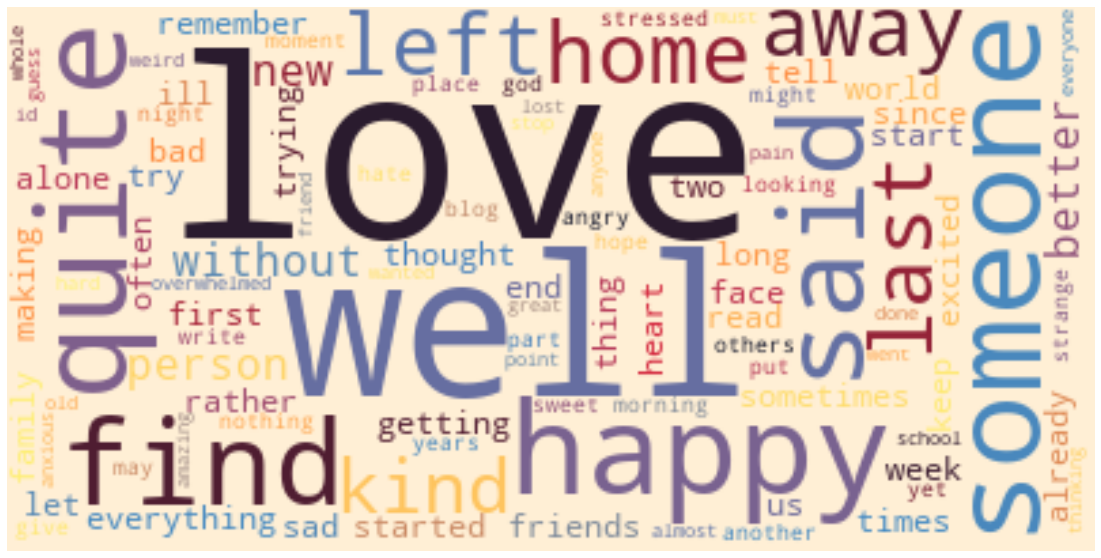

In [ ]:
hero.wordcloud(df.textHero, max_words=100,)

In [ ]:
df['textHero_tfidf'] = (hero.tfidf(df['textHero'], max_features=100))
df['pca_tfidf_texthero'] = hero.pca(df['textHero_tfidf'])
df

,Text,Emotion,textHero,nltk_tokenize_texthero,nltk_sequence_texthero,sequence_to_matrix,sequence_to_matrix_jeremy,sequence_matrix_mean,sequence_matrix_sum,textHero_tfidf,pca_tfidf_texthero
0,i didnt feel humiliated,0,humiliated,[humiliated],[479],"[0.42827001214027405, -0.07417800277471542, -0...","[0.42827001214027405, -0.07417800277471542, -0...",0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015926348116567172, -0.011567467434505993]"
1,i can go from feeling so hopeless to so damned...,0,hopeless damned hopeful someone c...,"[hopeless, damned, hopeful, someone, cares, aw...","[364, 3224, 393, 5, 1637, 1242]","[1.3164200186729431, 0.5070749893784523, 0.490...","[1.3164200186729431, 0.5070749893784523, 0.490...",0,26,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.022902425209207072, -0.02282590671759108]"
2,im grabbing a minute to post i feel greedy wrong,1,grabbing minute post greedy wrong,"[grabbing, minute, post, greedy, wrong]","[3225, 972, 121, 349, 243]","[-1.4404370002448559, 0.5677019860595465, -0.2...","[-1.4404370002448559, 0.5677019860595465, -0.2...",0,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015926348116564782, -0.011567467434508346]"
3,i am ever feeling nostalgic about the fireplac...,2,nostalgic fireplace property,"[nostalgic, fireplace, property]","[524, 5055, 3661]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9...",0,21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015926348116564147, -0.01156746743452261]"
4,i am feeling grouchy,1,grouchy,[grouchy],[905],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57...",0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015926348116564903, -0.011567467434505716]"
...,...,...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa stared friend dism,"[melissa, stared, friend, dism]","[19066, 1409, 100, 2638]","[0.730090007185936, -0.16345600225031376, -0.6...","[0.730090007185936, -0.16345600225031376, -0.6...",0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01592634811656472, -0.011567467434505398]"
21455,Successive state elections have seen the gover...,4,Successive state elections seen governing pa...,"[successive, state, elections, seen, governing...","[19067, 590, 4984, 633, 19068, 2266, 19069, 13...","[-1.0809049643576145, 3.124074012041092, -0.06...","[-1.0809049643576145, 3.124074012041092, -0.06...",0,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01592634811656472, -0.011567467434505398]"
21456,Vincent was irritated but not dismay,4,Vincent irritated dismay,"[vincent, irritated, dismay]","[9108, 324, 994]","[-0.034049972891807556, -0.19360798969864845, ...","[-0.034049972891807556, -0.19360798969864845, ...",0,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01592634811656472, -0.011567467434505398]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall Hume turned face dismayed coup,"[kendall, hume, turned, face, dismayed, coup]","[19071, 19072, 645, 38, 1339, 19073]","[-0.8034770004451275, 0.19953008415177464, -1....","[-0.8034770004451275, 0.19953008415177464, -1....",0,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.017791858325931945, -0.026787073545923554]"


In [ ]:
hero.scatterplot(df, col='pca_tfidf_texthero', color='Emotion', title="Emotion space")

In [ ]:
df_groupby = df.groupby('Emotion').mean()
df_groupby

In [ ]:
hero.scatterplot(df_groupby.reset_index(), col='sum_embedding_matrix', color='Emotion', title="Emotion space")

In [ ]:
df.groupby('Emotion').mean()

,sequence_matrix_mean,sequence_matrix_sum
Emotion,,
0,0.0,23.915882
1,0.0,22.604410
2,0.0,22.207191
3,0.0,19.711035
4,0.0,26.170814
5,0.0,21.018210


In [ ]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest
find_similar_word(emmbed_dict['angry'])[0:10]

['angry',
 'enraged',
 'furious',
 'irate',
 'outraged',
 'frustrated',
 'angered',
 'incensed',
 'provoked',
 'infuriated']

In [ ]:
df

,Text,Emotion,textHero,nltk_tokenize_texthero,nltk_sequence_texthero,sequence_to_matrix,sequence_to_matrix_jeremy,sequence_matrix_mean,sequence_matrix_sum
0,i didnt feel humiliated,0,humiliated,[humiliated],[479],"[0.42827001214027405, -0.07417800277471542, -0...","[0.42827001214027405, -0.07417800277471542, -0...",0.011527,2.305447
1,i can go from feeling so hopeless to so damned...,0,hopeless damned hopeful someone c...,"[hopeless, damned, hopeful, someone, cares, aw...","[364, 3224, 393, 5, 1637, 1242]","[1.3164200186729431, 0.5070749893784523, 0.490...","[1.3164200186729431, 0.5070749893784523, 0.490...",0.131544,26.308855
2,im grabbing a minute to post i feel greedy wrong,1,grabbing minute post greedy wrong,"[grabbing, minute, post, greedy, wrong]","[3225, 972, 121, 349, 243]","[-1.4404370002448559, 0.5677019860595465, -0.2...","[-1.4404370002448559, 0.5677019860595465, -0.2...",0.052070,10.413929
3,i am ever feeling nostalgic about the fireplac...,2,nostalgic fireplace property,"[nostalgic, fireplace, property]","[524, 5055, 3661]","[1.5496299862861633, -0.13044900447130203, 0.9...","[1.5496299862861633, -0.13044900447130203, 0.9...",0.105491,21.098117
4,i am feeling grouchy,1,grouchy,[grouchy],[905],"[0.701770007610321, -0.02660599909722805, 0.57...","[0.701770007610321, -0.02660599909722805, 0.57...",-0.001581,-0.316256
...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa stared friend dism,"[melissa, stared, friend, dism]","[19066, 1409, 100, 2638]","[0.730090007185936, -0.16345600225031376, -0.6...","[0.730090007185936, -0.16345600225031376, -0.6...",0.010680,2.136022
21455,Successive state elections have seen the gover...,4,Successive state elections seen governing pa...,"[successive, state, elections, seen, governing...","[19067, 590, 4984, 633, 19068, 2266, 19069, 13...","[-1.0809049643576145, 3.124074012041092, -0.06...","[-1.0809049643576145, 3.124074012041092, -0.06...",0.311540,62.307909
21456,Vincent was irritated but not dismay,4,Vincent irritated dismay,"[vincent, irritated, dismay]","[9108, 324, 994]","[-0.034049972891807556, -0.19360798969864845, ...","[-0.034049972891807556, -0.19360798969864845, ...",0.042622,8.524415
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall Hume turned face dismayed coup,"[kendall, hume, turned, face, dismayed, coup]","[19071, 19072, 645, 38, 1339, 19073]","[-0.8034770004451275, 0.19953008415177464, -1....","[-0.8034770004451275, 0.19953008415177464, -1....",0.040795,8.159081


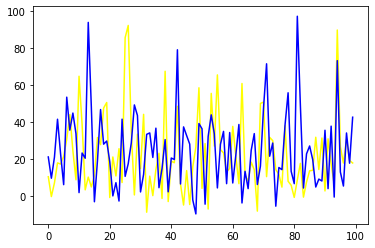

In [ ]:
plt.plot( np.arange(100), df[df.Emotion == 1 ].sequence_matrix_sum[0:100], color='yellow')
plt.plot( np.arange(100), df[df.Emotion == 2 ].sequence_matrix_sum[0:100], color='blue')
plt.plot( np.arange(100), df[df.Emotion == 3 ].sequence_matrix_sum[0:100], color='black')

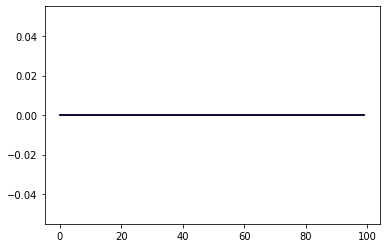

In [ ]:
plt.plot( np.arange(100), df[df.Emotion == 1 ].sequence_matrix_mean[0:100], color='yellow')
plt.plot( np.arange(100), df[df.Emotion == 2 ].sequence_matrix_mean[0:100], color='blue')
plt.plot( np.arange(100), df[df.Emotion == 3 ].sequence_matrix_mean[0:100], color='black')

In [ ]:
df.sequence_matrix_mean = df.sequence_matrix_mean.astype(int)
df.sequence_matrix_sum = df.sequence_matrix_sum.astype(int)

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1600],[636]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 1132]","[358, 3663, 387, 8, 38, 1132]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9414, 295, 36, 337, 132]","[1254, 295, 36, 337, 132]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15628, 5, 2411]","[15628, 651, 5, 2411]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15629, 372, 1721, 15631]","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7405, 675, 802]","[7405, 870, 802]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15632, 15633, 33, 1721, 15634]","[15632, 15633, 107, 33, 1721, 15634]"


In [ ]:
# Matrix of vectors 

df_matrix = pd.DataFrame(df.to_sequence_stopwords_text.apply(lambda row : embeder(row)))
df_matrix = pd.DataFrame(np.stack(df_matrix.to_sequence_stopwords_text.values))
df_matrix['target'] = df.Emotion
df_matrix

# Model FastText

In [ ]:
df.loc[df.Emotion == 0, 'Emotion'] = 'sadness'
df.loc[df.Emotion == 1, 'Emotion'] = 'anger'
df.loc[df.Emotion == 2, 'Emotion'] = 'love'
df.loc[df.Emotion == 3, 'Emotion'] = 'surprise' 
df.loc[df.Emotion == 4, 'Emotion'] = 'fear'
df.loc[df.Emotion == 5, 'Emotion'] = 'happy'

df.Emotion = np.asarray(df.Emotion).astype(str).reshape((-1,1))

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1600],[636]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 1132]","[358, 3663, 387, 8, 38, 1132]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9414, 295, 36, 337, 132]","[1254, 295, 36, 337, 132]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15628, 5, 2411]","[15628, 651, 5, 2411]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15629, 372, 1721, 15631]","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7405, 675, 802]","[7405, 870, 802]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15632, 15633, 33, 1721, 15634]","[15632, 15633, 107, 33, 1721, 15634]"


## Without lemmatize text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_text, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


textHero_train_df = pd.DataFrame(X_train.values, y_train).reset_index()
textHero_train_df.columns = ["target","clean_text"]
textHero_train_df["target"] = textHero_train_df[["target"]].apply(lambda x: '__label__' + x)



textHero_test_df = pd.DataFrame(X_test.values, y_test).reset_index()
textHero_test_df.columns = ["target","clean_text"]
textHero_test_df["target"] = textHero_test_df[["target"]].apply(lambda x: '__label__' + x)



textHero_valid_df = pd.DataFrame(X_valid.values, y_valid).reset_index()
textHero_valid_df.columns = ["target","clean_text"]
textHero_valid_df["target"] = textHero_valid_df[["target"]].apply(lambda x: '__label__' + x)


In [ ]:
textHero_valid_df

,target,clean_text
0,__label__happy,Nor thought alone might hold key myster...
1,__label__happy,said sir real company experience mba ...
2,__label__happy,content
3,__label__happy,quite passionate old children underg...
4,__label__anger,whether mad sad disappointed peaceful
...,...,...
1176,__label__happy,relaxed whenever privilege love serve
1177,__label__happy,You fortune said genuine amusem
1178,__label__sadness,depressed spiraling
1179,__label__happy,knew except lost girly gained graceful ...


In [ ]:
import fasttext

In [ ]:
import csv
textHero_train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/train_textHero.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/test_textHero.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_valid_df.to_csv('/content/drive/MyDrive/Colab Notebooks/valid_textHero.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [ ]:
model = fasttext.train_supervised(input="/content/drive/MyDrive/Colab Notebooks/train_textHero.txt",  wordNgrams = 2)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/test_textHero.txt') 

(1180, 0.864406779661017, 0.864406779661017)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/valid_textHero.txt') 

(1181, 0.8662150719729044, 0.8662150719729044)

## With lemmatize text

In [ ]:
df

,Text,Emotion,nltk_text_lematize,texthero_stopwords_text,texthero_stopwords_lemmatize,to_sequence_stopwords_text,to_sequence_stopwords_lemmatize
0,i didnt feel humiliated,0,i didnt feel humiliate,humiliated,humiliate,[1600],[636]
1,i can go from feeling so hopeless to so damned...,0,i can go from feel so hopeless to so damned ho...,hopeless damned hopeful someone c...,hopeless damned hopeful someone c...,"[358, 3663, 387, 8, 1132]","[358, 3663, 387, 8, 38, 1132]"
2,im grabbing a minute to post i feel greedy wrong,1,im grab a minute to post i feel greedy wrong,grabbing minute post greedy wrong,grab minute post greedy wrong,"[9414, 295, 36, 337, 132]","[1254, 295, 36, 337, 132]"
3,i am ever feeling nostalgic about the fireplac...,2,i be ever feel nostalgic about the fireplace i...,nostalgic fireplace property,nostalgic fireplace property,"[514, 4328, 3206]","[514, 4328, 3206]"
4,i am feeling grouchy,1,i be feel grouchy,grouchy,grouchy,[876],[876]
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,4,Melissa star at her friend in dism,Melissa stared friend dism,Melissa star friend dism,"[15628, 5, 2411]","[15628, 651, 5, 2411]"
21455,Successive state elections have seen the gover...,4,Successive state election have see the govern ...,Successive state elections seen governing pa...,Successive state election govern party pumm...,"[15629, 372, 1721, 15631]","[15629, 372, 2401, 7025, 506, 15630, 1721, 15631]"
21456,Vincent was irritated but not dismay,4,Vincent be irritate but not dismay,Vincent irritated dismay,Vincent irritate dismay,"[7405, 675, 802]","[7405, 870, 802]"
21457,Kendall-Hume turned back to face the dismayed ...,4,Kendall-Hume turn back to face the dismayed coup,Kendall Hume turned face dismayed coup,Kendall Hume turn face dismayed coup,"[15632, 15633, 33, 1721, 15634]","[15632, 15633, 107, 33, 1721, 15634]"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.texthero_stopwords_lemmatize, df.Emotion, train_size=0.89, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=2, shuffle=True)


textHero_train_df = pd.DataFrame(X_train.values, y_train).reset_index()
textHero_train_df.columns = ["target","clean_text"]
textHero_train_df["target"] = textHero_train_df[["target"]].apply(lambda x: '__label__' + x)



textHero_test_df = pd.DataFrame(X_test.values, y_test).reset_index()
textHero_test_df.columns = ["target","clean_text"]
textHero_test_df["target"] = textHero_test_df[["target"]].apply(lambda x: '__label__' + x)



textHero_valid_df = pd.DataFrame(X_valid.values, y_valid).reset_index()
textHero_valid_df.columns = ["target","clean_text"]
textHero_valid_df["target"] = textHero_valid_df[["target"]].apply(lambda x: '__label__' + x)


In [ ]:
import csv
textHero_train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/train_textHero_lemmatize.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/test_textHer_lemmatizeo.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
textHero_valid_df.to_csv('/content/drive/MyDrive/Colab Notebooks/valid_textHero_lemmatize.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [ ]:
model = fasttext.train_supervised(input="/content/drive/MyDrive/Colab Notebooks/train_textHero_lemmatize.txt",  wordNgrams = 2)

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/test_textHero.txt') 

In [ ]:
model.test('/content/drive/MyDrive/Colab Notebooks/valid_textHero.txt') 

# Data augmentation

# Hugging Face

In [ ]:
# code here 